# Data Analisys

# Settings

### Import packages and settings

In [1]:
from classes import sample
import pandas as pd
import numpy as np
from utils import utils as ut
from modules.memorycapacity import memorycapacity

In [2]:
PATH = "/Users/davidepilati/Library/CloudStorage/OneDrive-PolitecnicodiTorino/PhD/Misure/InrimARC/NWN_Pad130M/"
SAMPLE_NAME = "130M" 

### Initialize Sample with all measurements

Sample object constructor scans the sample folder for all the measurements, then fills every Measurement object with the necessary informations about the measurement for data analisys.

In [3]:
NWN_130M = sample.Sample(SAMPLE_NAME, PATH)
""" for meas in NWN_130M.measurements:
    print(meas.number, meas.experiment)
    if meas.experiment=="memorycapacity":
        print(f"scores: {meas.elec_scores}") """

len voltages: 3000
len voltages[0]: 14
{'Feature 0': df_resid    2.369000e+03
ssr         8.408108e+00
df_diff     1.000000e+00
ss_diff     1.155501e-01
F           3.255647e+01
Pr(>F)      1.302251e-08
Name: 1, dtype: float64, 'Feature 1': df_resid    2.369000e+03
ssr         8.408108e+00
df_diff     1.000000e+00
ss_diff     1.347220e+00
F           3.795818e+02
Pr(>F)      1.554095e-78
Name: 1, dtype: float64, 'Feature 2': df_resid    2.369000e+03
ssr         8.408108e+00
df_diff     1.000000e+00
ss_diff     1.170336e+00
F           3.297444e+02
Pr(>F)      4.275808e-69
Name: 1, dtype: float64, 'Feature 3': df_resid    2.369000e+03
ssr         8.408108e+00
df_diff     1.000000e+00
ss_diff     1.361062e-01
F           3.834816e+01
Pr(>F)      6.955547e-10
Name: 1, dtype: float64, 'Feature 4': df_resid    2369.000000
ssr            8.408108
df_diff        1.000000
ss_diff        0.003026
F              0.852668
Pr(>F)         0.355893
Name: 1, dtype: float64, 'Feature 5': df_resid    2

' for meas in NWN_130M.measurements:\n    print(meas.number, meas.experiment)\n    if meas.experiment=="memorycapacity":\n        print(f"scores: {meas.elec_scores}") '

In [4]:
mc_measurements = []
print("Memory capacity measurement numbers:")
for measurement in NWN_130M.measurements:
    if measurement.experiment == "memorycapacity":
        mc_measurements.append(measurement)
        print(f"{measurement.number}")

Memory capacity measurement numbers:
004
011
018
025
032
039
046
053


In [5]:
import matplotlib.pyplot as plt
import numpy as np

def plot_electrode_scores_grid(scores):
    """
    Plots a 4x4 matrix of electrode scores with square numbers in each cell.

    Args:
    scores (list of float): A list of 16 scores corresponding to each electrode.

    Raises:
    ValueError: If the number of scores is not exactly 16.
    """
    if len(scores) != 16:
        raise ValueError("The list of scores must contain exactly 16 elements.")

    # Convert the list of scores to a 4x4 numpy array
    score_matrix = np.array(scores).reshape(4, 4)

    # Create a figure and a plot
    fig, ax = plt.subplots(figsize=(6, 6))
    cax = ax.matshow(score_matrix, cmap='viridis', interpolation='nearest')
    
    # Add a color bar
    plt.colorbar(cax)

    # Remove axis ticks
    ax.set_xticks([])
    ax.set_yticks([])

    # Adding electrode numbers to the squares, using the specific order
    electrode_numbers = [
        14, 13, 11, 10,
        15, 12,  8,  9,
        16,  3,  5,  7,
         1,  2,  4,  6
    ]
    for i in range(4):
        for j in range(4):
            ax.text(j, i, f'{electrode_numbers[i*4 + j]}', va='center', ha='center', color='white')

    # Title for the plot
    plt.title('Electrode Scores')

    # Show the plot
    plt.show()


In [6]:
def insert_zeros(scores, positions, values=[0, 0]):
    """
    Inserts zeros into the scores list at the specified positions.

    Args:
    scores (list of float): The list of scores.
    positions (list of int): Indices where zeros should be inserted.
    values (list of float): Values to insert at the specified positions. Defaults to [0, 0].

    Returns:
    list of float: The new scores list with zeros inserted.

    Raises:
    ValueError: If the positions list is not exactly two elements long or if any index is out of range.
    """
    if len(positions) != 2 or len(values) != 2:
        raise ValueError("Both positions and values must contain exactly two elements.")

    # Ensure that the new list will have exactly 16 elements after insertion
    if len(scores) + len(values) != 16:
        raise ValueError("The original scores list and values must sum up to 16 elements.")

    # Copy the original scores to avoid modifying it directly
    new_scores = scores[:]
    # Insert zeros at the specified positions
    for pos, val in sorted(zip(positions, values), reverse=True):
        new_scores.insert(pos, val)

    return new_scores


### Run routine

In [7]:
meas = mc_measurements[0]
scores = meas.elec_scores
scores_formatted = insert_zeros(list(scores), [0,8])

In [8]:
def transform_to_matrix_grid_setup(vector):
    """
    Transforms a vector of 16 elements into a specified 4x4 matrix format.

    Args:
    vector (list of int): A list of 16 integers.

    Returns:
    numpy.ndarray: A 4x4 numpy array with the elements rearranged.

    Raises:
    ValueError: If the input vector does not contain exactly 16 elements.
    """
    if len(vector) != 16:
        raise ValueError("The input vector must contain exactly 16 elements.")

    # Create the matrix in the specified order
    matrix = [
        [vector[13], vector[12], vector[10], vector[9]],
        [vector[14], vector[11], vector[7], vector[8]],
        [vector[15], vector[2], vector[4], vector[6]],
        [vector[0], vector[1], vector[3], vector[5]]
    ]
    
    # Convert list to numpy array for consistency with plotting and other operations
    return np.array(matrix)


In [9]:
scores_formatted = transform_to_matrix_grid_setup(scores_formatted).flatten().tolist()

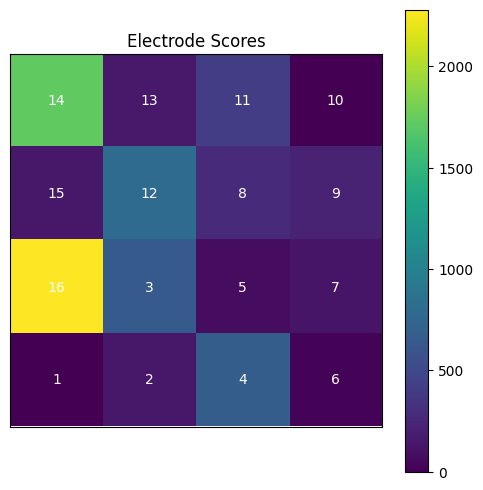

In [10]:
plot_electrode_scores_grid(scores_formatted)

In [11]:
meas_voltages = ut.extract_voltage_matrix(meas.data)
voltage_differences_mat = ut.compute_voltage_differences(meas_voltages)
voltage_differences, elec_pairs = ut.extract_upper_triangular_data(voltage_differences_mat)
target_base = meas_voltages[:, 0]

In [12]:

pair_scores = memorycapacity.ftest_from_matrices(target_base,np.array(voltage_differences).T)
score_matrix = ut.reshape_into_matrix(pair_scores, elec_pairs, 16)

len voltages: 3000
len voltages[0]: 120
k: 0
k: 1
120
idx: 0
idx: 1
idx: 2
idx: 3
idx: 4
idx: 5
idx: 6
idx: 7
idx: 8
idx: 9
idx: 10
idx: 11
idx: 12
idx: 13
idx: 14
idx: 15
idx: 16
idx: 17
idx: 18
idx: 19
idx: 20
idx: 21
idx: 22
idx: 23
idx: 24
idx: 25
idx: 26
idx: 27
idx: 28
idx: 29
idx: 30
idx: 31
idx: 32
idx: 33
idx: 34
idx: 35
idx: 36
idx: 37
idx: 38
idx: 39
idx: 40
idx: 41
idx: 42
idx: 43
idx: 44
idx: 45
idx: 46
idx: 47
idx: 48
idx: 49
idx: 50
idx: 51
idx: 52
idx: 53
idx: 54
idx: 55
idx: 56
idx: 57
idx: 58
idx: 59
idx: 60
idx: 61
idx: 62
idx: 63
idx: 64
idx: 65
idx: 66
idx: 67
idx: 68
idx: 69
idx: 70
idx: 71
idx: 72
idx: 73
idx: 74
idx: 75
idx: 76
idx: 77
idx: 78
idx: 79
idx: 80
idx: 81
idx: 82
idx: 83
idx: 84
idx: 85
idx: 86
idx: 87
idx: 88
idx: 89
idx: 90
idx: 91
idx: 92
idx: 93
idx: 94
idx: 95
idx: 96
idx: 97
idx: 98
idx: 99
idx: 100
idx: 101
idx: 102
idx: 103
idx: 104
idx: 105
idx: 106
idx: 107
idx: 108
idx: 109
idx: 110
idx: 111
idx: 112
idx: 113
idx: 114
idx: 115
idx: 116
idx

In [16]:
def plot_matrix_with_positions(matrix):
    """
    Plots values from a matrix based on a colorscale at positions indicated by position tuples in each matrix cell.

    Args:
    matrix (numpy.ndarray): A 2D array where each element is a tuple containing a value and a position tuple.
                            The position tuple indicates where to place the value in the plot.
    """
    # Extract the matrix size
    size = matrix.shape[0]

    # Initialize a matrix to store values for plotting
    plot_matrix = np.zeros((size, size))

    # Populate the plot matrix with the values at the specified positions
    for i in range(size):
        for j in range(size):
            value, position = matrix[i, j]
            if not value:
                value = 0
            plot_matrix[position] = value

    # Create the plot
    plt.figure(figsize=(6, 6))
    cax = plt.matshow(plot_matrix, cmap='viridis')
    plt.colorbar(cax)

    # Remove ticks on axes
    plt.xticks([])
    plt.yticks([])

    # Title for the plot
    plt.title('Matrix Values Display')

    # Show the plot
    plt.show()



In [17]:
score_matrix[0,1]

(inf, (0, 1))

/var/folders/_9/3m6hqqld0kx76783x498xxq80000gn/T/ipykernel_84104/4123519585.py:19: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if not value:


<Figure size 600x600 with 0 Axes>

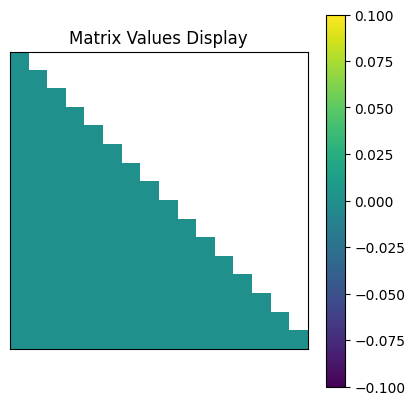

In [18]:
plot_matrix_with_positions(score_matrix)